In [ ]:

# @title Pyspark Installation
# install PySpark
! pip install pyspark >& /dev/null
! pip install gdown

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as fn
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType, TimestampType
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("MyDataApp") \
    .getOrCreate()


In [ ]:
df = spark.read.csv("/content/DataCoSupplyChainDataset.csv", header=True, inferSchema=True)


In [ ]:
df.show(5)
df.printSchema()

+--------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+-----------+--------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+--------------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+-------------+---------------+-------------------+-------------------+--------------------+------------+-------------+--------------+--------------------------+--------------+
|    Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per c

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as fn

# Start Spark session
spark = SparkSession.builder \
    .appName("DataCoSupplyChain") \
    .getOrCreate()

# Load the dataset
dataco_sdf = spark.read.csv("/content/DataCoSupplyChainDataset.csv", header=True, inferSchema=True)

# Convert string columns to timestamp
dataco_sdf = dataco_sdf.withColumn("shipping date (DateOrders)", fn.to_timestamp("shipping date (DateOrders)", "M/d/yyyy H:mm"))
dataco_sdf = dataco_sdf.withColumn("order date (DateOrders)", fn.to_timestamp("order date (DateOrders)", "M/d/yyyy H:mm"))

# Show first few rows
dataco_sdf.show(5, truncate=False)

# Show schema
dataco_sdf.printSchema()


+--------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+-----------+--------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+------------------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+-------------+---------------+-------------------+-------------------+--------------------------------------------+------------+-------------+--------------+--------------------------+--------------+
|Type    |Days for shipping (real)|Days for shipment (scheduled)|B

### summary

In [ ]:
dataco_sdf.describe().toPandas().head(20)

,summary,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,Shipping Mode
0,count,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,180519,180519,180516,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,24840,180519,180519,0,180519,180519,180519,180519,180519
1,mean,None,3.4976539865609713,2.931846509231715,21.974988638593583,183.10760850780738,None,0.5482913155955883,31.85145053983237,None,None,None,None,None,6691.37949467923,None,None,None,94416.0,None,35921.12691395776,5.443460245181948,None,29.719954662073526,-84.9156746878377,None,None,None,6691.37949467923,36221.8949030296,692.5097635151978,20.664741121946605,0.10166819055205156,90260.0,141.23254992876335,0.12064663549029081,2.127637533999191,203.77209608624023,183.10760850780738,21.974988638593583,None,None,None,55426.13232689211,692.5097635151978,31.85145053983237,None,None,None,141.23254992876335,0.0,None
2,stddev,None,1.623721828374161,1.3744492800079773,104.43352574698625,120.04367002812536,None,0.49766386328809326,15.640063883389173,None,None,None,None,None,4162.918105728275,None,None,None,2324.4121837574335,None,37542.46112229264,1.6292460350717721,None,9.81364632692285,21.43324120028382,None,None,None,4162.918105728275,21045.37956885943,336.44680733022005,21.800900954295965,0.0704152153254764,52111.49095928847,139.732492003743,0.4667956046074952,1.453451481422638,132.2730774997035,120.04367002812536,104.43352574698625,None,None,None,31919.279100725274,336.44680733022005,15.640063883389173,None,None,None,139.732492003743,0.0,None
3,min,CASH,0,0,-4274.97998,7.489999771,Advance shipping,0,2,Accessories,Aguadilla,EE. UU.,XXXXXXXXX,Aaron,1,Abbott,XXXXXXXXX,Consumer,91732,1 Bright Manor,603,2,Apparel,-33.93755341,-158.0259857,Africa,Aachen,Afganist�n,1,1,19,0.0,0.0,1,9.989999771,-2.75,1,9.989999771,7.489999771,-4274.97998,Canada,Abia,CANCELED,1040,19,2,None,http://images.acmesports.sports/Adult+dog+supp...,Adult dog supplies,9.989999771,0,First Class
4,max,TRANSFER,6,4,911.7999878,1939.98999,Shipping on time,1,76,Women's Golf Clubs,Zanesville,Puerto Rico,XXXXXXXXX,Zorita,20757,Zuniga,XXXXXXXXX,Home Office,WV,Elk Grove,99205,12,Technology,48.78193283,115.2630768,USCA,�st� nad Labem,Zimbabue,20757,77204,1363,500.0,0.25,180519,1999.98999,0.5,5,1999.98999,1939.98999,911.7999878,Western Europe,�st� nad Labem,SUSPECTED_FRAUD,99301,1363,76,None,http://images.acmesports.sports/insta-bed+Neve...,insta-bed Neverflat Air Mattress,1999.98999,0,Standard Class


In [ ]:
access_log_sdf.describe().toPandas().head(20)

,summary,Product,Category,Month,Hour,Department,ip,url
0,count,469977,469977,469977,469977,469977,469977,469977
1,mean,None,None,None,14.591826834079114,None,None,None
2,stddev,None,None,None,5.5740143669327304,None,None,None
3,min,Bag Boy Beverage Holder,accessories,Dec,0,apparel,1.100.203.104,/department/apparel/category/cleats/product/Pe...
4,max,insta-bed Neverflat Air Mattress,women's golf clubs,Sep,23,outdoors,99.99.191.106,/department/outdoors/category/women's%20golf%2...


In [ ]:
dataco_sdf.select('Order status').distinct().show()

+---------------+
|   Order status|
+---------------+
|PENDING_PAYMENT|
|       COMPLETE|
|        ON_HOLD|
| PAYMENT_REVIEW|
|     PROCESSING|
|         CLOSED|
|SUSPECTED_FRAUD|
|        PENDING|
|       CANCELED|
+---------------+



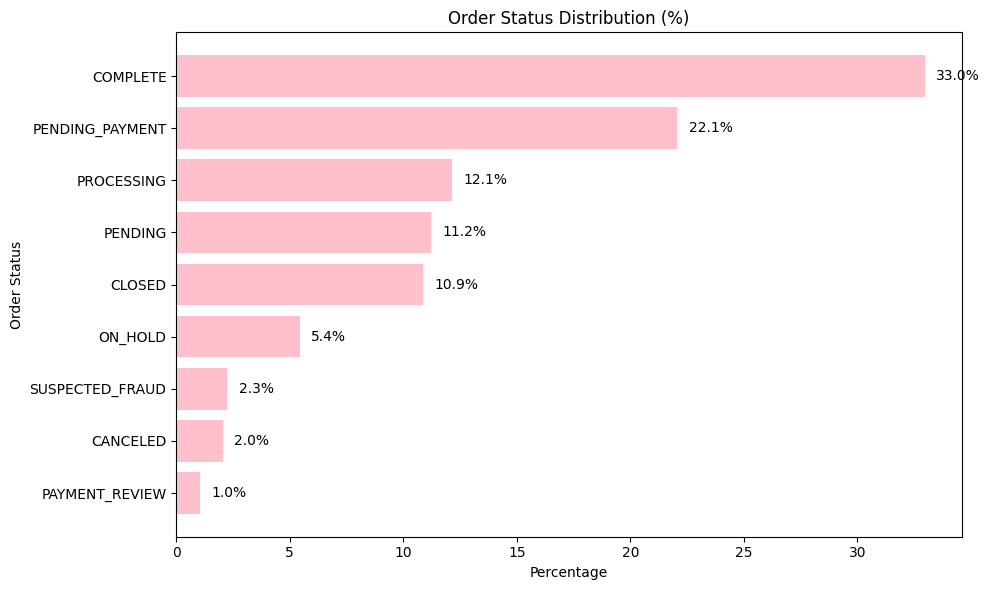

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Get the count of unique values in the 'Order status' column
order_status_counts = dataco_sdf.groupBy('Order Status').count()

# Step 2: Convert to Pandas
order_status_counts_pd = order_status_counts.toPandas()

# Step 3: Calculate percentage
total = order_status_counts_pd['count'].sum()
order_status_counts_pd['percentage'] = (order_status_counts_pd['count'] / total) * 100

# Step 4: Sort for better visuals (optional)
order_status_counts_pd = order_status_counts_pd.sort_values('percentage', ascending=True)

# Step 5: Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(order_status_counts_pd['Order Status'], order_status_counts_pd['percentage'], color='pink')

# Add percentage text on bars
for index, value in enumerate(order_status_counts_pd['percentage']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

# Labels and title
plt.xlabel('Percentage')
plt.ylabel('Order Status')
plt.title('Order Status Distribution (%)')
plt.tight_layout()
plt.show()


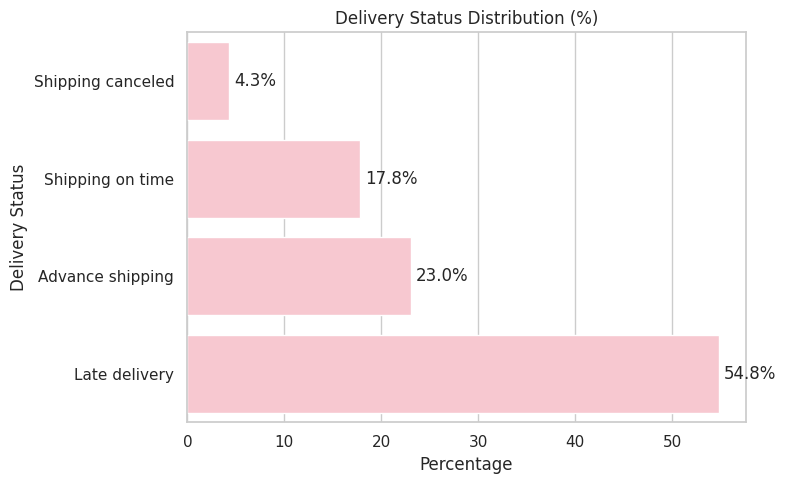

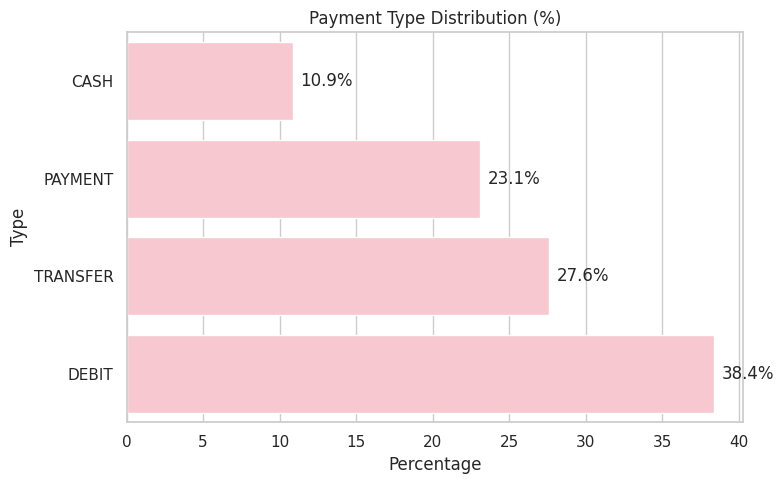

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ========== Bar chart for Delivery Status ==========
# Group and count by Delivery Status
delivery_status_df = dataco_sdf.groupBy("Delivery Status").count()

# Calculate percentage
total_delivery = delivery_status_df.agg(fn.sum("count")).first()[0]
delivery_status_df = delivery_status_df.withColumn("percentage", (delivery_status_df["count"] / total_delivery) * 100)

# Convert to Pandas
delivery_status_pd = delivery_status_df.toPandas().sort_values("percentage", ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.barplot(
    x="percentage",
    y="Delivery Status",
    data=delivery_status_pd,
    color="pink"
)

# Add percentage labels
for index, value in enumerate(delivery_status_pd["percentage"]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.title("Delivery Status Distribution (%)")
plt.xlabel("Percentage")
plt.ylabel("Delivery Status")
plt.tight_layout()
plt.show()


# ========== Bar chart for Type ==========
# Group and count by Type
type_df = dataco_sdf.groupBy("Type").count()

# Calculate percentage
total_type = type_df.agg(fn.sum("count")).first()[0]
type_df = type_df.withColumn("percentage", (type_df["count"] / total_type) * 100)

# Convert to Pandas
type_pd = type_df.toPandas().sort_values("percentage", ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.barplot(
    x="percentage",
    y="Type",
    data=type_pd,
    color="pink"
)

# Add percentage labels
for index, value in enumerate(type_pd["percentage"]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.title("Payment Type Distribution (%)")
plt.xlabel("Percentage")
plt.ylabel("Type")
plt.tight_layout()
plt.show()


### Missing values

In [ ]:
from pyspark.sql import functions as F

# Check for missing values (nulls) in each column
missing_values = dataco_sdf.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in dataco_sdf.columns])

missing_values.show()


+----+------------------------+-----------------------------+-----------------+------------------+---------------+------------------+-----------+-------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+---------------+----------------+-------------+---------------+--------+---------+------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+-----+----------------+----------------------+------------+-----------+------------+-------------+---------------+-------------------+-------------------+-------------+------------+-------------+--------------+--------------------------+-------------+
|Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer|Delivery Status|Late_delivery_risk|Ca

In [ ]:
from pyspark.sql import functions as F

# Check for missing values (nulls) in each column
missing_values = dataco_sdf.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in dataco_sdf.columns])

# Filter columns where missing values are greater than 0
missing_values = missing_values.select([c for c in missing_values.columns if missing_values.select(c).first()[0] > 0])

missing_values.show()


+--------------+----------------+-------------+-------------------+
|Customer Lname|Customer Zipcode|Order Zipcode|Product Description|
+--------------+----------------+-------------+-------------------+
|             8|               3|       155679|             180519|
+--------------+----------------+-------------+-------------------+



### Treating the mising values

In [ ]:
# Drop rows where 'Customer Zipcode' is missing
dataco_sdf = dataco_sdf.dropna(subset=["Customer Zipcode"])

# Fill missing values in 'Order Zipcode' with 0
dataco_sdf = dataco_sdf.fillna({"Order Zipcode": 0})

# Show the updated DataFrame
#dataco_sdf.show()



In [ ]:
from pyspark.sql import functions as F

# Count missing values in 'Customer Zipcode' and 'Order Zipcode'
missing_customer_zipcode = dataco_sdf.filter(F.col("Customer Zipcode").isNull()).count()
missing_order_zipcode = dataco_sdf.filter(F.col("Order Zipcode").isNull()).count()

# Print the counts of missing values
print(f"Missing values in 'Customer Zipcode': {missing_customer_zipcode}")
print(f"Missing values in 'Order Zipcode': {missing_order_zipcode}")


Missing values in 'Customer Zipcode': 0
Missing values in 'Order Zipcode': 0


In [ ]:
from pyspark.sql import functions as F

# Check for missing values (nulls) in each column
missing_values = dataco_sdf.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in dataco_sdf.columns])

# Filter columns where missing values are greater than 0
missing_values = missing_values.select([c for c in missing_values.columns if missing_values.select(c).first()[0] > 0])

missing_values.show()

+--------------+-------------------+
|Customer Lname|Product Description|
+--------------+-------------------+
|             8|             180516|
+--------------+-------------------+



In [ ]:
dataco_sdf.columns

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

there are still missing values in Customer Lname and product description

## Selecting only required columns

In [ ]:
# PySpark code to select specified columns
dataco_selected_sdf = dataco_sdf.select('Type'
        , 'Days for shipping (real)'
        , 'Days for shipment (scheduled)'
        , 'Benefit per order'
        , 'Sales per customer'
        # , 'Delivery Status'
        , 'Late_delivery_risk'
        # , 'Category Id'
        , 'Category Name'
        , 'Customer City'
        , 'Customer Country'
        # , 'Customer Email'
        # , 'Customer Fname'
        # , 'Customer Id'
        # , 'Customer Lname'
        # , 'Customer Password'
        , 'Customer Segment'
        , 'Customer State'
        , 'Customer Street'
        , 'Customer Zipcode'
        # , 'Department Id'
        , 'Department Name'
        , 'Latitude'
        , 'Longitude'
        , 'Market'
        , 'Order City'
        , 'Order Country'
        # , 'Order Customer Id'
        , 'order date (DateOrders)'
        # , 'Order Id'
        # , 'Order Item Cardprod Id'
        , 'Order Item Discount'
        , 'Order Item Discount Rate'
        # , 'Order Item Id'
        , 'Order Item Product Price'
        , 'Order Item Profit Ratio'
        , 'Order Item Quantity'
        , 'Sales'
        , 'Order Item Total'
        , 'Order Profit Per Order'
        , 'Order Region'
        , 'Order State'
        , 'Order Status'
        , 'Order Zipcode'
        # , 'Product Card Id'
        , 'Product Category Id'
        , 'Product Description'
        # , 'Product Image'
        # , 'Product Name'
        , 'Product Price'
        , 'Product Status'
        , 'shipping date (DateOrders)'
        , 'Shipping Mode')



### Feature engineering late_days, late_delivery

In [ ]:
from pyspark.sql import functions as fn

# Calculate 'late_days' as the difference between 'Days for shipping (real)' and 'Days for shipment (scheduled)'
dataco_selected_sdf = dataco_selected_sdf.withColumn(
    'late_days',
    fn.col('Days for shipping (real)') - fn.col('Days for shipment (scheduled)')
)

# Create a 'Late_delivery' column: if 'late_days' >= 1, then 'Late', else 'Not Late'
dataco_selected_sdf = dataco_selected_sdf.withColumn(
    'Late_delivery',
    fn.when(fn.col('late_days') >= fn.lit(1), fn.lit('Late')).otherwise(fn.lit('Not Late'))
)

# Assuming you have a list of columns to keep and new names for them:
col_l = [
    'Type', 'late_days', 'Late_delivery', 'Benefit per order', 'Sales per customer',
    'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode',
    'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country',
    'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate',
    'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity',
    'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region',
    'Order State', 'Order Status', 'Order Zipcode', 'Product Category Id',
    'Product Description', 'Product Price', 'Product Status',
    'shipping date (DateOrders)', 'Shipping Mode', 'Days for shipping (real)'
        , 'Days for shipment (scheduled)'
]

rename_col_l = [
    'Type', 'late_days', 'Late_delivery', 'Benefit_per_order', 'Sales_per_customer',
    'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country',
    'Customer_Segment', 'Customer_State', 'Customer_Street', 'Customer_Zipcode',
    'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City', 'Order_Country',
    'order_date', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
    'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
    'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
    'Order_Zipcode', 'Product_Category_Id', 'Product_Description', 'Product_Price',
    'Product_Status', 'shipping_date', 'Shipping_Mode', 'Days_for_shipping',
    'Days_for_shipment'
]

# Selecting the required columns and renaming them according to the new list of column names
dataco_selected_sdf = dataco_selected_sdf.select(*col_l).toDF(*rename_col_l)

# Show the first 5 rows to verify the result
dataco_selected_sdf.show(5)


+--------+---------+-------------+-----------------+------------------+------------------+--------------+-------------+----------------+----------------+--------------+--------------------+----------------+---------------+-----------+------------+------------+----------+-------------+-------------------+-------------------+------------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+-------------+-------------------+-------------------+-------------+--------------+-------------------+--------------+-----------------+-----------------+
|    Type|late_days|Late_delivery|Benefit_per_order|Sales_per_customer|Late_delivery_risk| Category_Name|Customer_City|Customer_Country|Customer_Segment|Customer_State|     Customer_Street|Customer_Zipcode|Department_Name|   Latitude|   Longitude|      Market|Order_City|Order_Country|         order_date|Order_Item_Discount|Order_I

In [ ]:
dataco_selected_sdf.columns

['Type',
 'late_days',
 'Late_delivery',
 'Benefit_per_order',
 'Sales_per_customer',
 'Late_delivery_risk',
 'Category_Name',
 'Customer_City',
 'Customer_Country',
 'Customer_Segment',
 'Customer_State',
 'Customer_Street',
 'Customer_Zipcode',
 'Department_Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order_City',
 'Order_Country',
 'order_date',
 'Order_Item_Discount',
 'Order_Item_Discount_Rate',
 'Order_Item_Product_Price',
 'Order_Item_Profit_Ratio',
 'Order_Item_Quantity',
 'Sales',
 'Order_Item_Total',
 'Order_Profit_Per_Order',
 'Order_Region',
 'Order_State',
 'Order_Status',
 'Order_Zipcode',
 'Product_Category_Id',
 'Product_Description',
 'Product_Price',
 'Product_Status',
 'shipping_date',
 'Shipping_Mode',
 'Days_for_shipping',
 'Days_for_shipment']

In [ ]:
from pyspark.sql import functions as fn

# Extracting parts of the 'order_date' timestamp
dataco_selected_sdf = dataco_selected_sdf \
    .withColumn('order_year', fn.year('order_date')) \
    .withColumn('order_month', fn.month('order_date')) \
    .withColumn('order_day', fn.dayofweek('order_date')) \
    .withColumn('order_hour', fn.hour('order_date'))

# Show to verify
dataco_selected_sdf.select('order_date', 'order_year', 'order_month', 'order_day', 'order_hour').show(5)


+-------------------+----------+-----------+---------+----------+
|         order_date|order_year|order_month|order_day|order_hour|
+-------------------+----------+-----------+---------+----------+
|2018-01-31 22:56:00|      2018|          1|        4|        22|
|2018-01-13 12:27:00|      2018|          1|        7|        12|
|2018-01-13 12:06:00|      2018|          1|        7|        12|
|2018-01-13 11:45:00|      2018|          1|        7|        11|
|2018-01-13 11:24:00|      2018|          1|        7|        11|
+-------------------+----------+-----------+---------+----------+
only showing top 5 rows



<ipython-input-45-81752b39d5af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Late_delivery', palette='pastel')


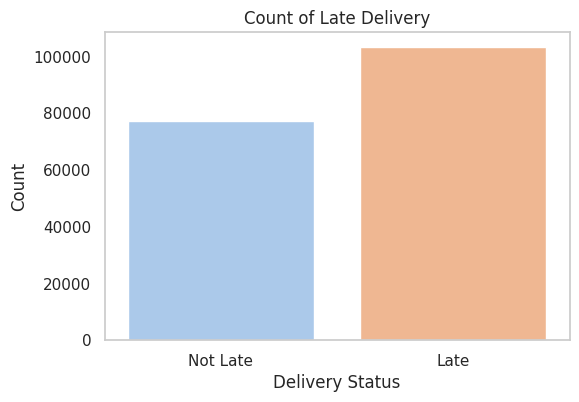

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Late_delivery', palette='pastel')
plt.title('Count of Late Delivery')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.grid(False)
plt.show()


<ipython-input-46-55ee753f78f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_late_days, x='Late_delivery', y='late_days', palette='pink')


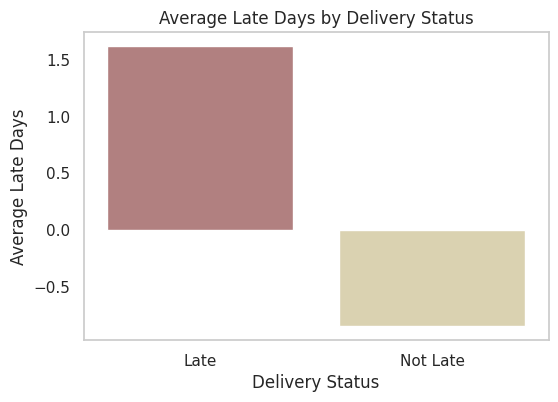

In [ ]:
plt.figure(figsize=(6, 4))
avg_late_days = df.groupby('Late_delivery')['late_days'].mean().reset_index()
sns.barplot(data=avg_late_days, x='Late_delivery', y='late_days', palette='pastel')
plt.title('Average Late Days by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Average Late Days')
plt.grid(False)
plt.show()


<ipython-input-51-67095c80946a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


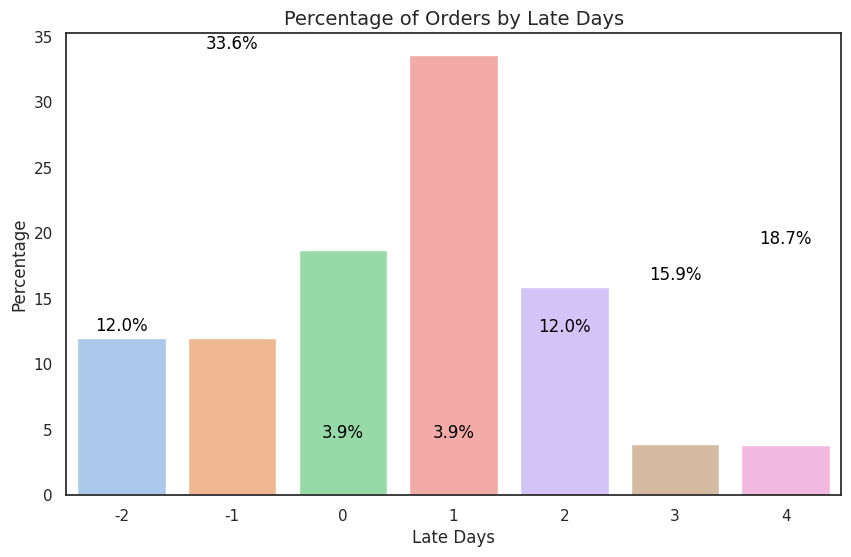

In [ ]:
# Count late_days using PySpark
late_day_counts_sdf = dataco_selected_sdf.groupBy('late_days').count()

# Convert to Pandas for plotting
late_day_counts_pdf = late_day_counts_sdf.toPandas().sort_values('late_days')
# Calculate percentage
total = late_day_counts_pdf['count'].sum()
late_day_counts_pdf['percentage'] = (late_day_counts_pdf['count'] / total) * 100
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("white")  # Remove gridlines

# Bar plot
bars = sns.barplot(
    data=late_day_counts_pdf,
    x='late_days',
    y='percentage',
    palette='pastel'
)

# Annotate each bar with %
for index, row in late_day_counts_pdf.iterrows():
    bars.text(index, row['percentage'] + 0.5, f"{row['percentage']:.1f}%", ha='center', color='black')

# Title and labels
plt.title('Percentage of Orders by Late Days', fontsize=14)
plt.xlabel('Late Days')
plt.ylabel('Percentage')

# Remove gridlines
plt.grid(False)
plt.show()



### Bar Chart: Count of Shipping by Shipping_Mode and Late_delivery

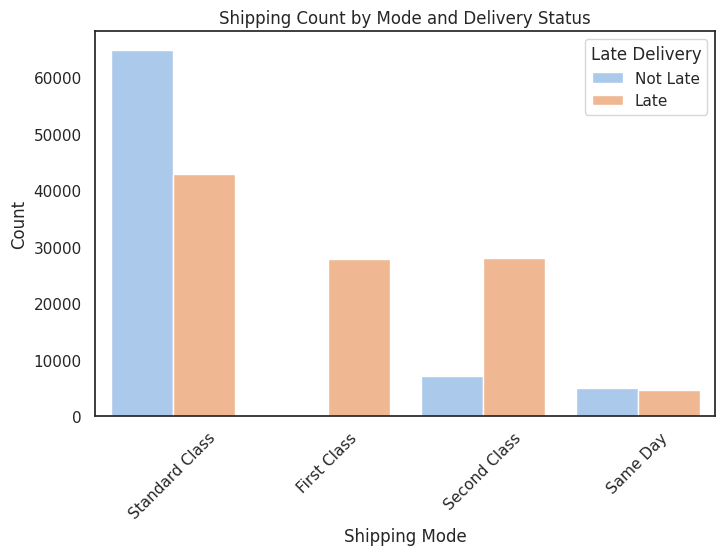

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Shipping_Mode', hue='Late_delivery', palette='pastel')
plt.title('Shipping Count by Mode and Delivery Status')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Late Delivery')
plt.grid(False)
plt.show()


In [ ]:
df.columns

Index(['Type', 'late_days', 'Late_delivery', 'Benefit_per_order',
       'Sales_per_customer', 'Late_delivery_risk', 'Category_Name',
       'Customer_City', 'Customer_Country', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City',
       'Order_Country', 'order_date', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_State', 'Order_Status', 'Order_Zipcode', 'Product_Category_Id',
       'Product_Description', 'Product_Price', 'Product_Status',
       'shipping_date', 'Shipping_Mode', 'order_year', 'order_month',
       'order_day', 'order_hour'],
      dtype='object')

In [ ]:
df.Order_Region.unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

### Bar chart for region vise delivery status

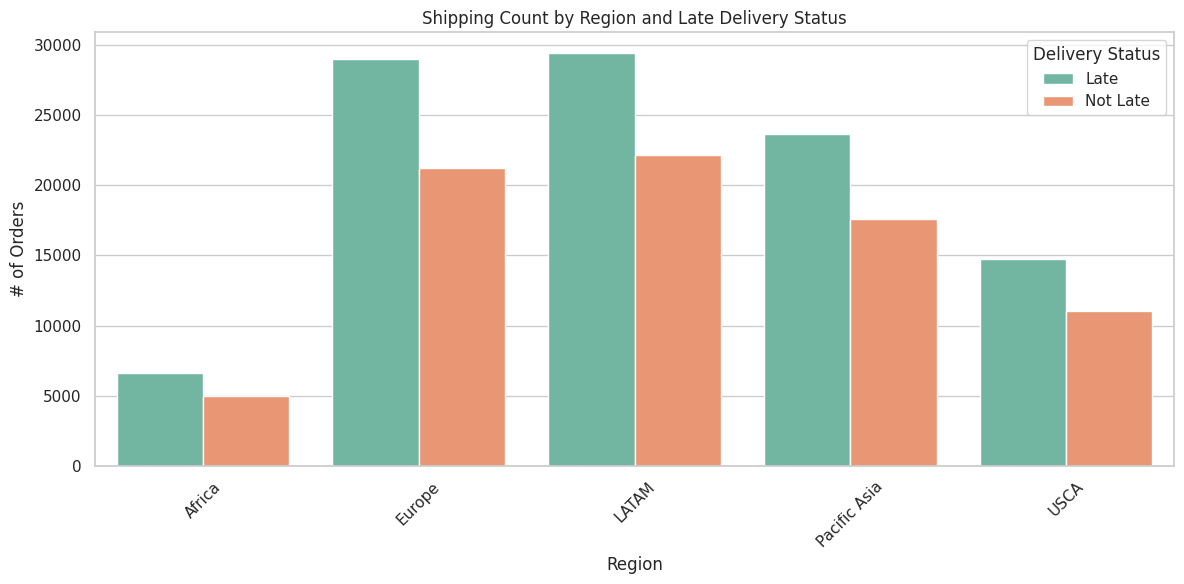

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set Seaborn style
sns.set(style="whitegrid")

# Step 1: Define mapping from detailed to grouped regions
region_mapping = {
    'West Africa': 'Africa', 'Central Africa': 'Africa', 'North Africa': 'Africa',
    'East Africa': 'Africa', 'Southern Africa': 'Africa',

    'Western Europe': 'Europe', 'Northern Europe': 'Europe',
    'Southern Europe': 'Europe', 'Eastern Europe': 'Europe',

    'Central America': 'LATAM', 'Caribbean': 'LATAM', 'South America': 'LATAM',

    'Southeast Asia': 'Pacific Asia', 'South Asia': 'Pacific Asia',
    'Eastern Asia': 'Pacific Asia', 'Oceania': 'Pacific Asia',
    'Central Asia': 'Pacific Asia', 'West Asia': 'Pacific Asia',

    'West of USA ': 'USCA', 'US Center ': 'USCA', 'East of USA': 'USCA',
    'South of  USA ': 'USCA', 'Canada': 'USCA'
}

# Step 2: Map the regions in the DataFrame
df['Region_Grouped'] = df['Order_Region'].map(region_mapping)

# Step 3: Group by Region and Late Delivery status
grouped_data = df.groupby(['Region_Grouped', 'Late_delivery']).size().reset_index(name='Order_Count')

# Step 4: Plot the grouped bar chart with a new color palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x='Region_Grouped',
    y='Order_Count',
    hue='Late_delivery',
    palette='Set2'  # Try 'Set1', 'muted', 'colorblind', etc.
)

# Step 5: Aesthetics
plt.title('Shipping Count by Region and Late Delivery Status')
plt.xlabel('Region')
plt.ylabel('# of Orders')
plt.xticks(rotation=45)
plt.legend(title='Delivery Status')
plt.tight_layout()

# Show plot
plt.show()


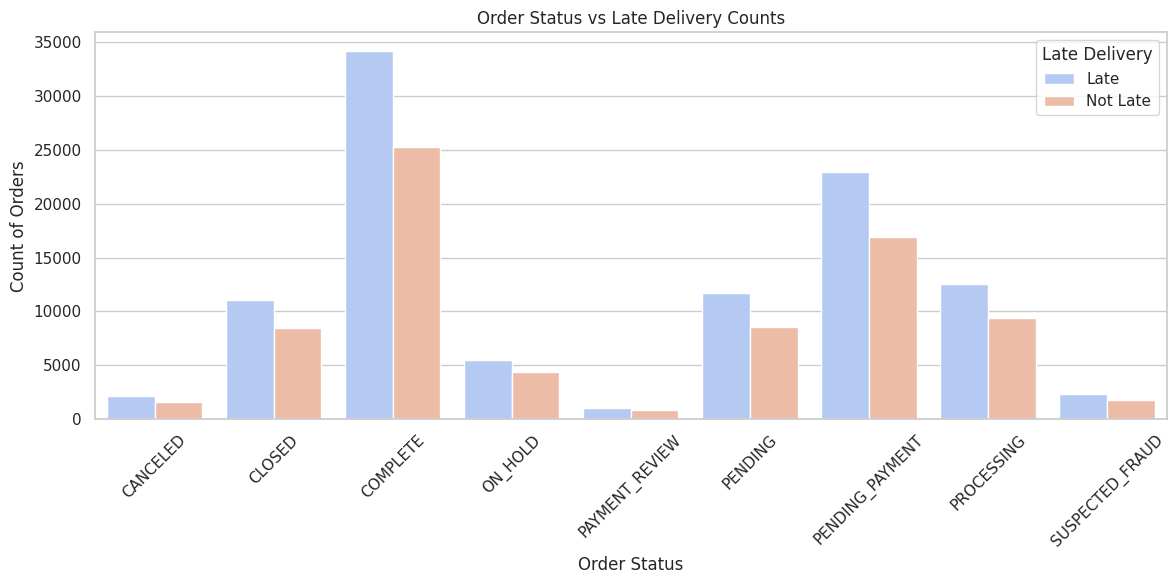

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Order_Status' and 'Late_delivery' to count the number of orders
order_status_late_delivery_count = df.groupby(['Order_Status', 'Late_delivery']).size().reset_index(name='count')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Status', y='count', hue='Late_delivery', data=order_status_late_delivery_count, palette='coolwarm')

# Customize the plot
plt.title('Order Status vs Late Delivery Counts')
plt.xlabel('Order Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.legend(title='Late Delivery')
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-66-5e1eb982e6ee>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Order_Status', y='count', data=order_status_count, palette='coolwarm')


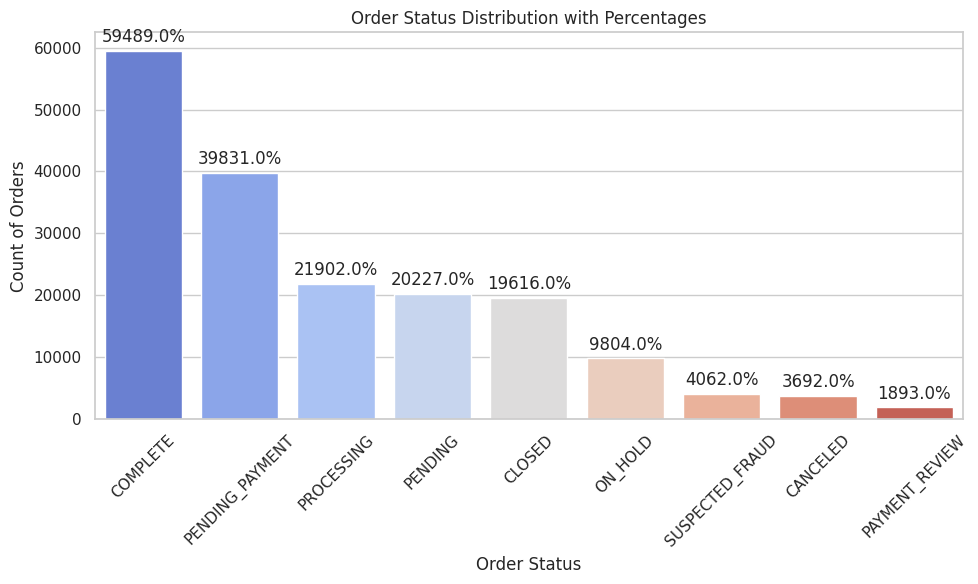

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of orders in each 'Order_Status'
order_status_count = df['Order_Status'].value_counts().reset_index(name='count')
order_status_count.columns = ['Order_Status', 'count']

# Calculate the percentage for each 'Order_Status'
total_orders = order_status_count['count'].sum()
order_status_count['percentage'] = (order_status_count['count'] / total_orders) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Order_Status', y='count', data=order_status_count, palette='coolwarm')

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Order Status Distribution with Percentages')
plt.xlabel('Order Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
dataco_selected_sdf.printSchema()

root
 |-- Type: string (nullable = true)
 |-- late_days: integer (nullable = true)
 |-- Late_delivery: string (nullable = false)
 |-- Benefit_per_order: double (nullable = true)
 |-- Sales_per_customer: double (nullable = true)
 |-- Late_delivery_risk: integer (nullable = true)
 |-- Category_Name: string (nullable = true)
 |-- Customer_City: string (nullable = true)
 |-- Customer_Country: string (nullable = true)
 |-- Customer_Segment: string (nullable = true)
 |-- Customer_State: string (nullable = true)
 |-- Customer_Street: string (nullable = true)
 |-- Customer_Zipcode: integer (nullable = true)
 |-- Department_Name: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Market: string (nullable = true)
 |-- Order_City: string (nullable = true)
 |-- Order_Country: string (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- Order_Item_Discount: double (nullable = true)
 |-- Order_Item_Discount_Rate: double (nulla

In [ ]:
# Encode categorical variables

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

temp_data_sdf = dataco_selected_sdf

col_l = temp_data_sdf.columns

y_col = 'Late_delivery'

columns_to_index = ['Shipping_Mode', 'Customer_Segment', 'Late_delivery']

index_order_dict = {
    'Shipping_Mode': ['Same Day', 'First Class', 'Standard Class', 'Second Class'],
    'Customer_Segment': ['Corporate', 'Home Office', 'Consumer']
}

columns_to_encode = [
    'Type', 'Late_delivery', 'Category_Name', 'Customer_City', 'Customer_Country',
    'Customer_Segment', 'Customer_State', 'Customer_Street', 'Customer_Zipcode',
    'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Region',
    'Order_State', 'Order_Status', 'Order_Year',
    # 'Order_Month',
    # 'Order_Day',
    # 'Order_Hour'
]

remove_col_l = [
    'order_date', 'shipping_date', 'Product_Description',
    'Longitude', 'Latitude', 'late_days', 'Product_Status'
]

remove_col_l = remove_col_l  # + [y_col]

columns_to_index = [col for col in columns_to_index if (col not in remove_col_l and col in col_l)]
columns_to_encode = [col for col in columns_to_encode if (col not in (remove_col_l + columns_to_index) and col in col_l)]

# Create a list of stages for the Pipeline
stages = []

# Iterate over each categorical column
for col in (columns_to_index + columns_to_encode):
    if col in remove_col_l:
        break
    else:
        # StringIndexer to convert categorical values to indices
        indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")
        stages += [indexer]
        if col in columns_to_encode:
            encoder = OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encode", dropLast=False)
            stages += [encoder]

# Assemble all encoded features into a single vector
numeric_col_l = [col for col in col_l if col not in (columns_to_encode + columns_to_index + remove_col_l)]
indexed_col_l = [f"{col}_index" for col in columns_to_index]
encoded_col_l = [f"{col}_encode" for col in columns_to_encode]

assembler_inputs = numeric_col_l + [f"{col}_encode" for col in columns_to_encode]
assembler_inputs = numeric_col_l + indexed_col_l

vector_col = "features"
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol=vector_col)
stages.append(assembler)

# Create the Pipeline
pipeline = Pipeline(stages=stages)

# Fit the Pipeline to the DataFrame
pipeline_model = pipeline.fit(temp_data_sdf)

# Transform the DataFrame
temp_data_sdf = pipeline_model.transform(temp_data_sdf)

vector_sdf = temp_data_sdf.select(vector_col)

# Get the correlation matrix
matrix = Correlation.corr(vector_sdf, vector_col)

# Show first 5 rows (optional)
# temp_data_sdf.show(5)


In [ ]:
# Final Data

# Removing some columns
remove_col_l = ['late_days', 'Late_delivery_risk']

final_data_sdf = dataco_selected_sdf.drop(*remove_col_l)

# Define the split ratios for training and testing data
train_ratio = 0.8  # 80% of data for training, 20% for testing
test_ratio = 1 - train_ratio

# Split the data into training and testing sets
train_sdf, test_sdf = final_data_sdf.randomSplit([train_ratio, test_ratio], seed=98)


In [ ]:
# dim_l = ['Customer_State', 'Late_delivery']
col_s = 'Customer_Segment'

# Calculate total count for each customer segment
total_counts_df = dataco_selected_sdf.groupBy(col_s).count().withColumnRenamed('count', 'total_count')

# Group by count
temp_sdf = dataco_selected_sdf
# Only Late
temp_sdf = temp_sdf.filter(fn.col('Late_delivery') == fn.lit('Late'))
# Group by count
temp_sdf = temp_sdf.groupby(col_s).agg(fn.count('*').alias('count'), fn.avg('late_days').alias('avg_late_days'))

# Join total counts with the original data
temp_sdf = total_counts_df.join(temp_sdf, on=col_s, how='left').fillna(0)

# Calculate percentage of late delivery
temp_sdf = temp_sdf.withColumn('late_delivery_percentage', fn.col('count') / fn.col('total_count') * 100)

# Convert to pandas dataframe for easier manipulation
data_df = temp_sdf.select(col_s, 'count', 'total_count', 'avg_late_days', 'late_delivery_percentage').toPandas()
data_df = data_df.sort_values(by='late_delivery_percentage').reset_index(drop=True)

# Display the top 50 rows
data_df.head(50)


,Customer_Segment,count,total_count,avg_late_days,late_delivery_percentage
0,Corporate,31291,54788,1.621808,57.112871
1,Consumer,53572,93502,1.611159,57.295031
2,Home Office,18536,32226,1.624353,57.518774


In [ ]:
# Encode categorical variables
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

# Define column list
col_l = train_sdf.columns

y_col = 'Late_delivery'

# Columns to index and encode
columns_to_index = []  # Add columns that need to be indexed, if any

# Index order dictionary (optional: define custom ordering for certain columns)
index_order_dict = {
    'Shipping_Mode': ['Same Day', 'First Class', 'Standard Class', 'Second Class'],
    'Customer_Segment': ['Corporate', 'Home Office', 'Consumer']
}

columns_to_encode = [
    'Type',
    'Product_Category_Name',
    'Customer_City',
    'Customer_Country',
    'Customer_Segment',
    'Customer_State',
    'Customer_Street',
    'Customer_Zipcode',
    'Department_Name',
    'Market',
    'Order_City',
    'Order_Country',
    'Order_Region',
    'Order_State',
    'Order_Status',
    'Order_Year',
    'Shipping_Mode'
]

# Remove unwanted columns
remove_col_l = ['Order_Date', 'Shipping_Date', 'Product_Description',
                'Longitude', 'Latitude', 'Late_Days',
                'Product_Status', 'Delivery_Status']

remove_col_l = remove_col_l + [y_col]

# Filter columns to index and encode based on the data and removed columns
columns_to_index = [col for col in columns_to_index if (col not in remove_col_l and col in col_l)]
columns_to_encode = [col for col in columns_to_encode if (col not in (remove_col_l + columns_to_index) and col in col_l)]

# Create a list of stages for the pipeline
stages = []

# Iterate over each categorical column to apply StringIndexer and OneHotEncoder
for col in (columns_to_index + columns_to_encode):
    if col in remove_col_l:
        break
    else:
        # StringIndexer to convert categorical values to indices
        indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")
        stages += [indexer]
        if col in columns_to_encode:
            # OneHotEncoder to convert index to binary vector
            encoder = OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encode", dropLast=False)
            stages += [encoder]

# Assemble all encoded features into a single vector
assembler_inputs = [col for col in col_l if col not in (columns_to_index + columns_to_encode + remove_col_l)] \
                    + [f"{col}_index" for col in columns_to_index] \
                    + [f"{col}_encode" for col in columns_to_encode]

vector_col = "features"
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol=vector_col)
stages.append(assembler)

# Label column (StringIndexer)
indexer = StringIndexer(inputCol=y_col, outputCol='label')
stages.append(indexer)

# Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol='label')
stages.append(rf)

# Create the pipeline
rf_pipeline = Pipeline(stages=stages)


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

# Define column list
col_l = train_sdf.columns

y_col = 'Late_delivery'  # Target column

# Columns to index and encode
columns_to_index = []  # Add columns that need to be indexed, if any

# Index order dictionary (optional: define custom ordering for certain columns)
index_order_dict = {
    'Shipping_Mode': ['Same Day', 'First Class', 'Standard Class', 'Second Class'],
    'Customer_Segment': ['Corporate', 'Home Office', 'Consumer']
}

columns_to_encode = [
    'Type',
    'Category_Name',  # Updated to 'Category_Name'
    'Customer_City',
    'Customer_Country',
    'Customer_Segment',
    'Customer_State',
    'Customer_Street',
    'Customer_Zipcode',
    'Department_Name',
    'Market',
    'Order_City',
    'Order_Country',
    'Order_Region',
    'Order_State',
    'Order_Status',
    'Shipping_Mode'
]

# Remove unwanted columns
remove_col_l = ['order_date', 'shipping_date', 'Product_Description',
                'Longitude', 'Latitude', 'Late_Days',
                'Product_Status', 'Delivery_Status']

remove_col_l = remove_col_l + [y_col]

# Filter columns to index and encode based on the data and removed columns
columns_to_index = [col for col in columns_to_index if (col not in remove_col_l and col in col_l)]
columns_to_encode = [col for col in columns_to_encode if (col not in (remove_col_l + columns_to_index) and col in col_l)]

# Create a list of stages for the pipeline
stages = []

# Iterate over each categorical column to apply StringIndexer and OneHotEncoder
for col in (columns_to_index + columns_to_encode):
    if col in remove_col_l:
        break
    else:
        # StringIndexer to convert categorical values to indices
        indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")
        stages += [indexer]
        if col in columns_to_encode:
            # OneHotEncoder to convert index to binary vector
            encoder = OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encode", dropLast=False)
            stages += [encoder]

# Assemble all encoded features into a single vector
assembler_inputs = [col for col in col_l if col not in (columns_to_index + columns_to_encode + remove_col_l)] \
                    + [f"{col}_index" for col in columns_to_index] \
                    + [f"{col}_encode" for col in columns_to_encode]

vector_col = "features"
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol=vector_col)
stages.append(assembler)

# Label column (StringIndexer)
indexer = StringIndexer(inputCol=y_col, outputCol='label')
stages.append(indexer)

# Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol='label')
stages.append(rf)

# Create the pipeline
rf_pipeline = Pipeline(stages=stages)

# Fit the pipeline to the training data
rf_model = rf_pipeline.fit(train_sdf)

# Predictions on the training data
predictions = rf_model.transform(train_sdf)

# Columns to keep in the output
col_l = ['features', 'label', 'rawPrediction', 'probability', 'prediction']

# Select the desired columns from the predictions DataFrame
predictions = predictions.select(*col_l)

# Display the predictions (top 15 rows)
predictions.show(15)


+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(13914,[0,1,2,3,4...|  0.0|[12.3847671122905...|[0.61923835561452...|       0.0|
|(13914,[0,1,4,5,6...|  0.0|[11.4570233937326...|[0.57285116968663...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[11.1427152039035...|[0.55713576019517...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[11.4570233937326...|[0.57285116968663...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[12.2620526991027...|[0.61310263495513...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[12.2620526991027...|[0.61310263495513...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[11.4570233937326...|[0.57285116968663...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[12.2620526991027...|[0.61310263495513...|       0.0|
|(13914,[0,1,2,3,4...|  0.0|[12.3847671122905...|[0.61923835561452...|       0.0|
|(13914,[0,1,2,3

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

# Make prediction
predictionAndTarget = predictions.select("label", "prediction")

# Create both evaluators
metrics_binary = BinaryClassificationMetrics(predictionAndTarget.rdd.map(tuple))
metrics_multi = MulticlassMetrics(predictionAndTarget.rdd.map(tuple))

# Calculate Evaluation Metric
accuracy = metrics_multi.accuracy
auc = metrics_binary.areaUnderROC

print(f'Accuracy: {accuracy:.4f} [{accuracy:.2%}]')
print(f'AUC: {auc:.4f} [{auc:.2%}]')


/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy: 0.5726 [57.26%]
AUC: 0.7862 [78.62%]


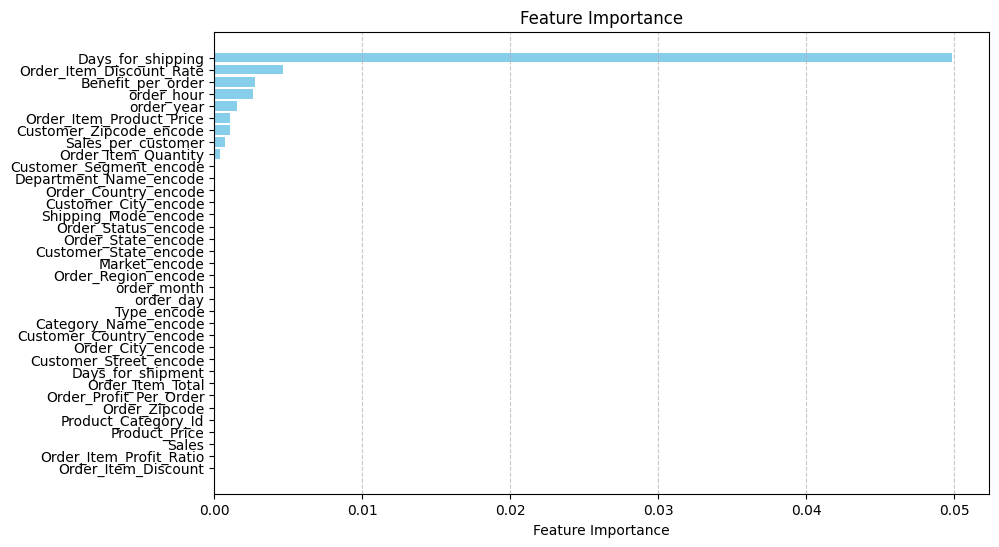

,COL,FI
15,order_month,0.000000e+00
16,Order_Region_encode,0.000000e+00
17,Market_encode,0.000000e+00
18,Customer_State_encode,0.000000e+00
19,Order_State_encode,0.000000e+00
20,Order_Status_encode,0.000000e+00
21,Shipping_Mode_encode,0.000000e+00
22,Customer_City_encode,8.799883e-09
23,Order_Country_encode,7.602086e-07
24,Department_Name_encode,5.262330e-06


In [ ]:
# FEATURE IMPORTANCE
import pandas as pd
import matplotlib.pyplot as plt

va = rf_model.stages[-3]
rf = rf_model.stages[-1]

# display(rf) #visualize the decision tree model
# print(rf.toDebugString) #print the nodes of the decision tree model

data_l = list(zip(va.getInputCols(), rf.featureImportances))
fi_df = pd.DataFrame(data_l, columns=['COL', 'FI'])

fi_df = fi_df.sort_values(by='FI', ascending=True).reset_index(drop = True)


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(fi_df['COL'], fi_df['FI'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

display(fi_df.tail(20))

## Logistic Regression

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

# Define column list
col_l = train_sdf.columns

y_col = 'Late_delivery'

# Columns to index and encode
columns_to_index = []  # Add if needed, based on manual ordering

# Optional: Specify ordering if you want consistent category mapping
index_order_dict = {
    'Shipping_Mode': ['Same Day', 'First Class', 'Standard Class', 'Second Class'],
    'Customer_Segment': ['Corporate', 'Home Office', 'Consumer']
}

columns_to_encode = [
    'Type',
    'Category_Name',
    'Customer_City',
    'Customer_Country',
    'Customer_Segment',
    'Customer_State',
    'Customer_Street',
    'Customer_Zipcode',
    'Department_Name',
    'Market',
    'Order_City',
    'Order_Country',
    'Order_Region',
    'Order_State',
    'Order_Status',
    'order_year',
    'Shipping_Mode'
]

# Remove unwanted columns
remove_col_l = ['order_date', 'shipping_date', 'Product_Description',
                'Longitude', 'Latitude', 'Product_Status']

remove_col_l = remove_col_l + [y_col]

# Filter columns
columns_to_index = [col for col in columns_to_index if (col not in remove_col_l and col in col_l)]
columns_to_encode = [col for col in columns_to_encode if (col not in (remove_col_l + columns_to_index) and col in col_l)]

# Create pipeline stages
stages = []

# Apply indexing and encoding
for col in (columns_to_index + columns_to_encode):
    if col in remove_col_l:
        continue
    indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")
    stages += [indexer]
    if col in columns_to_encode:
        encoder = OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encode", dropLast=False)
        stages += [encoder]

# Assemble features
assembler_inputs = [col for col in col_l if col not in (columns_to_index + columns_to_encode + remove_col_l)] \
                    + [f"{col}_index" for col in columns_to_index] \
                    + [f"{col}_encode" for col in columns_to_encode]

vector_col = "features"
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol=vector_col)
stages.append(assembler)

# Label indexing
indexer = StringIndexer(inputCol=y_col, outputCol='label')
stages.append(indexer)

# Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol='label')
stages.append(lr)

# Create pipeline
lr_pipeline = Pipeline(stages=stages)


In [ ]:
# Prediction
predictions = lr_model.transform(train_sdf)

# Columns to keep
col_l = ['features', 'label', 'rawPrediction', 'probability', 'prediction']

# Prediction
predictions = predictions.select(*col_l)

# Display
predictions.show(15)

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

# Make prediction
predictionAndTarget = predictions.select("label", "prediction")

# Create both evaluators
metrics_binary = BinaryClassificationMetrics(predictionAndTarget.rdd.map(tuple))
metrics_multi = MulticlassMetrics(predictionAndTarget.rdd.map(tuple))

# Calculate Evaluation Metric
accuracy = metrics_multi.accuracy
precision = metrics_multi.precision(1.0)
recall = metrics_multi.recall(1.0)
f1_score = metrics_multi.fMeasure(1.0)
auc = metrics_binary.areaUnderROC

print(f'Accuracy: {accuracy:.4f} [{accuracy:.2%}]')
print(f'Precision: {precision:.4f} [{precision:.2%}]')
print(f'Recall: {recall:.4f} [{recall:.2%}]')
print(f'F1 Score: {f1_score:.4f} [{f1_score:.2%}]')
print(f'AUC: {auc:.4f} [{auc:.2%}]')

/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy: 1.0000 [100.00%]
Precision: 1.0000 [100.00%]
Recall: 1.0000 [100.00%]
F1 Score: 1.0000 [100.00%]
AUC: 1.0000 [100.00%]


In [ ]:
train_sdf.columns

['Type',
 'Late_delivery',
 'Benefit_per_order',
 'Sales_per_customer',
 'Category_Name',
 'Customer_City',
 'Customer_Country',
 'Customer_Segment',
 'Customer_State',
 'Customer_Street',
 'Customer_Zipcode',
 'Department_Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order_City',
 'Order_Country',
 'order_date',
 'Order_Item_Discount',
 'Order_Item_Discount_Rate',
 'Order_Item_Product_Price',
 'Order_Item_Profit_Ratio',
 'Order_Item_Quantity',
 'Sales',
 'Order_Item_Total',
 'Order_Profit_Per_Order',
 'Order_Region',
 'Order_State',
 'Order_Status',
 'Order_Zipcode',
 'Product_Category_Id',
 'Product_Description',
 'Product_Price',
 'Product_Status',
 'shipping_date',
 'Shipping_Mode',
 'Days_for_shipping',
 'Days_for_shipment',
 'order_year',
 'order_month',
 'order_day',
 'order_hour',
 'class_weight']

In [ ]:
train_sdf.columns

['Type',
 'Late_delivery',
 'Benefit_per_order',
 'Sales_per_customer',
 'Category_Name',
 'Customer_City',
 'Customer_Country',
 'Customer_Segment',
 'Customer_State',
 'Customer_Street',
 'Customer_Zipcode',
 'Department_Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order_City',
 'Order_Country',
 'order_date',
 'Order_Item_Discount',
 'Order_Item_Discount_Rate',
 'Order_Item_Product_Price',
 'Order_Item_Profit_Ratio',
 'Order_Item_Quantity',
 'Sales',
 'Order_Item_Total',
 'Order_Profit_Per_Order',
 'Order_Region',
 'Order_State',
 'Order_Status',
 'Order_Zipcode',
 'Product_Category_Id',
 'Product_Description',
 'Product_Price',
 'Product_Status',
 'shipping_date',
 'Shipping_Mode',
 'Days_for_shipping',
 'Days_for_shipment',
 'order_year',
 'order_month',
 'order_day',
 'order_hour']

In [ ]:
from pyspark.sql.functions import col, when, count, lit
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics, BinaryClassificationMetrics
import numpy as np

# Step 1: Drop irrelevant columns
remove_col_l = [
    'order_date', 'shipping_date', 'Product_Description',
    'Longitude', 'Latitude', 'Product_Status', 'Order_Status',
    'Order_Profit_Per_Order', 'Order_Item_Profit_Ratio',
    'Order_Item_Discount_Rate', 'Order_Item_Discount',
    'class_weight', 'Late_delivery'
]

categorical_cols = [
    'Type', 'Category_Name', 'Customer_City', 'Customer_Country',
    'Customer_Segment', 'Customer_State', 'Customer_Street', 'Customer_Zipcode',
    'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Region',
    'Order_State', 'Order_Zipcode', 'Shipping_Mode'
]

categorical_cols = [c for c in categorical_cols if c in train_sdf.columns]

# Step 2: Train/Test split
train_data, test_data = train_sdf.randomSplit([0.8, 0.2], seed=42)

# Step 3: Class weighting
label_counts = train_data.groupBy('Late_delivery').count().collect()
class_counts = {row['Late_delivery']: row['count'] for row in label_counts}
minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)
balancing_ratio = class_counts[minority_class] / class_counts[majority_class]

train_data = train_data.withColumn(
    "class_weight",
    when(col("Late_delivery") == majority_class, lit(balancing_ratio)).otherwise(lit(1.0))
)
test_data = test_data.withColumn("class_weight", lit(1.0))

# Step 4: Feature engineering pipeline
stages = []
for cat_col in categorical_cols:
    indexer = StringIndexer(inputCol=cat_col, outputCol=f"{cat_col}_index", handleInvalid="keep")
    encoder = OneHotEncoder(inputCol=f"{cat_col}_index", outputCol=f"{cat_col}_encoded")
    stages += [indexer, encoder]

y_col = "Late_delivery"
input_features = [
    col for col in train_data.columns
    if col not in remove_col_l + categorical_cols
]
assembler_inputs = input_features + [f"{c}_encoded" for c in categorical_cols]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
stages.append(assembler)

label_indexer = StringIndexer(inputCol=y_col, outputCol="label")
stages.append(label_indexer)

# Logistic Regression with regularization
lr = LogisticRegression(
    featuresCol="features",
    labelCol="label",
    weightCol="class_weight",
    regParam=0.1,         # Regularization (L2)
    elasticNetParam=0.0   # 0.0 = Ridge, 1.0 = Lasso, 0.5 = ElasticNet
)
stages.append(lr)

pipeline = Pipeline(stages=stages)
lr_model = pipeline.fit(train_data)

# Step 5: Evaluation Function
def evaluate_model(data, model, label="label"):
    predictions = model.transform(data)
    predictionAndLabels = predictions.select("prediction", label).rdd.map(tuple)

    metrics_multi = MulticlassMetrics(predictionAndLabels)
    metrics_binary = BinaryClassificationMetrics(predictionAndLabels)

    acc = metrics_multi.accuracy
    prec = metrics_multi.precision(1.0)
    rec = metrics_multi.recall(1.0)
    f1 = metrics_multi.fMeasure(1.0)
    auc = metrics_binary.areaUnderROC

    conf_matrix = metrics_multi.confusionMatrix().toArray()

    print(f"Accuracy : {acc:.4f} [{acc:.2%}]")
    print(f"Precision: {prec:.4f} [{prec:.2%}]")
    print(f"Recall   : {rec:.4f} [{rec:.2%}]")
    print(f"F1 Score : {f1:.4f} [{f1:.2%}]")
    print(f"AUC      : {auc:.4f} [{auc:.2%}]\n")

    tn, fp = conf_matrix[0]
    fn, tp = conf_matrix[1]

    print("Confusion Matrix:")
    print(f"True Negatives : {int(tn)}")
    print(f"False Positives: {int(fp)}")
    print(f"False Negatives: {int(fn)}")
    print(f"True Positives : {int(tp)}\n")

    print("Confusion Matrix Table:")
    print(conf_matrix)

# Step 6: Run evaluation
print("===== Train Set Performance =====")
evaluate_model(train_data, lr_model)

print("\n===== Test Set Performance =====")
evaluate_model(test_data, lr_model)


===== Train Set Performance =====


/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy : 0.9618 [96.18%]
Precision: 0.9388 [93.88%]
Recall   : 0.9743 [97.43%]
F1 Score : 0.9562 [95.62%]
AUC      : 0.9634 [96.34%]

Confusion Matrix:
True Negatives : 62792
False Positives: 3130
False Negatives: 1267
True Positives : 48012

Confusion Matrix Table:
[[62792.  3130.]
 [ 1267. 48012.]]

===== Test Set Performance =====
Accuracy : 0.9329 [93.29%]
Precision: 0.9037 [90.37%]
Recall   : 0.9437 [94.37%]
F1 Score : 0.9233 [92.33%]
AUC      : 0.9343 [93.43%]

Confusion Matrix:
True Negatives : 15338
False Positives: 1247
False Negatives: 698
True Positives : 11701

Confusion Matrix Table:
[[15338.  1247.]
 [  698. 11701.]]


In [ ]:
conf_matrix = metrics_multi.confusionMatrix().toArray()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    labels = ['On-time (0)', 'Late (1)']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues",
                xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


===== Train Set Confusion Matrix Performance =====
Accuracy : 0.9618 [96.18%]
Precision: 0.9388 [93.88%]
Recall   : 0.9743 [97.43%]
F1 Score : 0.9562 [95.62%]
AUC      : 0.9952 [99.52%]

Confusion Matrix:
True Negatives : 62792
False Positives: 3130
False Negatives: 1267
True Positives : 48012

Confusion Matrix Table:
[[62792.  3130.]
 [ 1267. 48012.]]


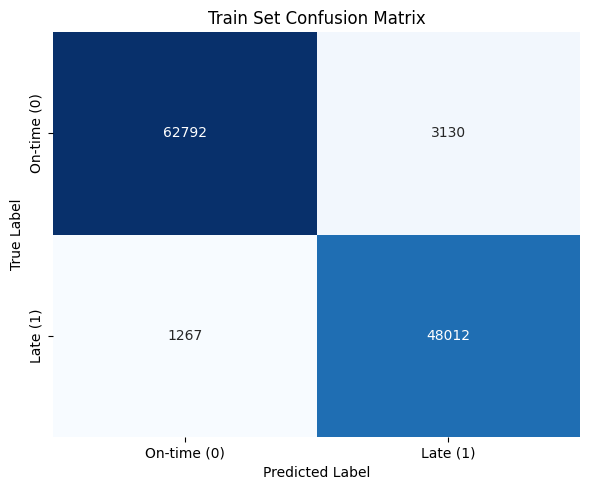

/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


===== Test Set Confusion Matrix Performance =====
Accuracy : 0.9329 [93.29%]
Precision: 0.9037 [90.37%]
Recall   : 0.9437 [94.37%]
F1 Score : 0.9233 [92.33%]
AUC      : 0.9838 [98.38%]

Confusion Matrix:
True Negatives : 15338
False Positives: 1247
False Negatives: 698
True Positives : 11701

Confusion Matrix Table:
[[15338.  1247.]
 [  698. 11701.]]


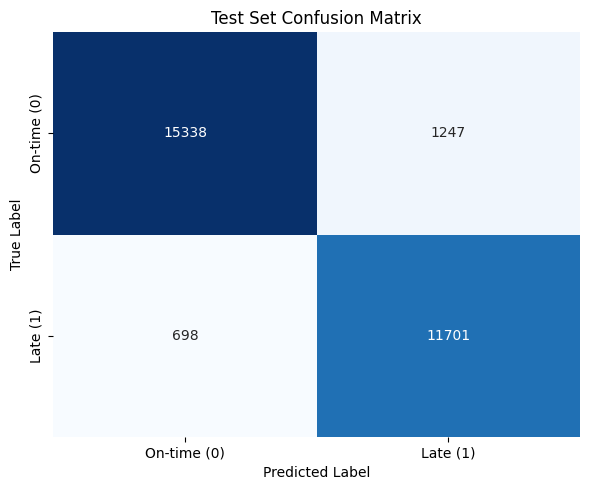

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_and_plot_confusion_matrix(data, model, title="Confusion Matrix"):
    predictions = model.transform(data)

    y_true = predictions.select("label").rdd.flatMap(lambda x: x).collect()
    y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

    from pyspark.mllib.evaluation import MulticlassMetrics
    predictionAndLabels = predictions.select("prediction", "label").rdd.map(lambda row: (float(row[0]), float(row[1])))
    metrics_multi = MulticlassMetrics(predictionAndLabels)
    conf_matrix = metrics_multi.confusionMatrix().toArray()

    accuracy = metrics_multi.accuracy
    precision = metrics_multi.precision(1.0)
    recall = metrics_multi.recall(1.0)
    f1 = metrics_multi.fMeasure(1.0)

    from pyspark.mllib.evaluation import BinaryClassificationMetrics
    predictionAndLabels_binary = predictions.select("probability", "label").rdd.map(lambda row: (float(row["probability"][1]), float(row["label"])))
    metrics_binary = BinaryClassificationMetrics(predictionAndLabels_binary)
    auc = metrics_binary.areaUnderROC

    print(f"===== {title} Performance =====")
    print(f"Accuracy : {accuracy:.4f} [{accuracy*100:.2f}%]")
    print(f"Precision: {precision:.4f} [{precision*100:.2f}%]")
    print(f"Recall   : {recall:.4f} [{recall*100:.2f}%]")
    print(f"F1 Score : {f1:.4f} [{f1*100:.2f}%]")
    print(f"AUC      : {auc:.4f} [{auc*100:.2f}%]\n")

    TN, FP = conf_matrix[0]
    FN, TP = conf_matrix[1]

    print("Confusion Matrix:")
    print(f"True Negatives : {int(TN)}")
    print(f"False Positives: {int(FP)}")
    print(f"False Negatives: {int(FN)}")
    print(f"True Positives : {int(TP)}\n")

    print("Confusion Matrix Table:")
    print(conf_matrix)

    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues",
                xticklabels=['On-time (0)', 'Late (1)'],
                yticklabels=['On-time (0)', 'Late (1)'],
                cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage:
evaluate_and_plot_confusion_matrix(train_data, lr_model, title="Train Set Confusion Matrix")
evaluate_and_plot_confusion_matrix(test_data, lr_model, title="Test Set Confusion Matrix")


<ipython-input-39-5072c4c6c8ff>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df.head(15), x="Coefficient", y="Feature", palette="coolwarm")


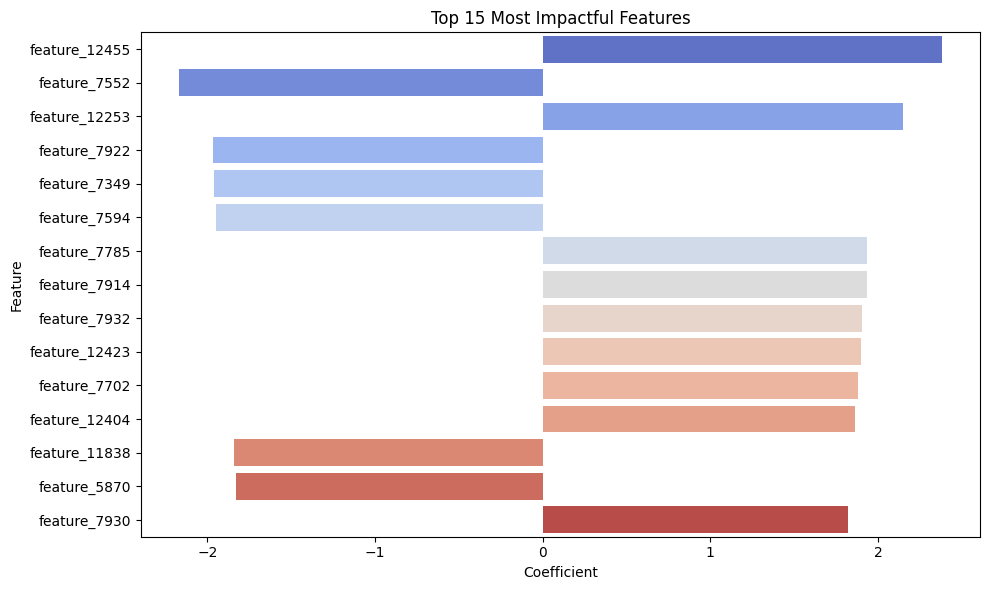

In [ ]:
# Extract the Logistic Regression model
from pyspark.ml.classification import LogisticRegressionModel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the LogisticRegressionModel from pipeline
lr_stage = [stage for stage in lr_model.stages if isinstance(stage, LogisticRegressionModel)][0]

# Get the VectorAssembler stage (to access input feature names)
from pyspark.ml.feature import VectorAssembler
assembler_stage = [stage for stage in lr_model.stages if isinstance(stage, VectorAssembler)][0]

feature_names = assembler_stage.getInputCols()
coefficients = lr_stage.coefficients.toArray()

# If there's a mismatch in length, create fallback names
if len(coefficients) != len(feature_names):
    feature_names = [f"feature_{i}" for i in range(len(coefficients))]

# Create DataFrame
coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=lambda x: abs(x), ascending=False)

# Plot Top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=coeff_df.head(15), x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Top 15 Most Impactful Features")
plt.tight_layout()
plt.show()


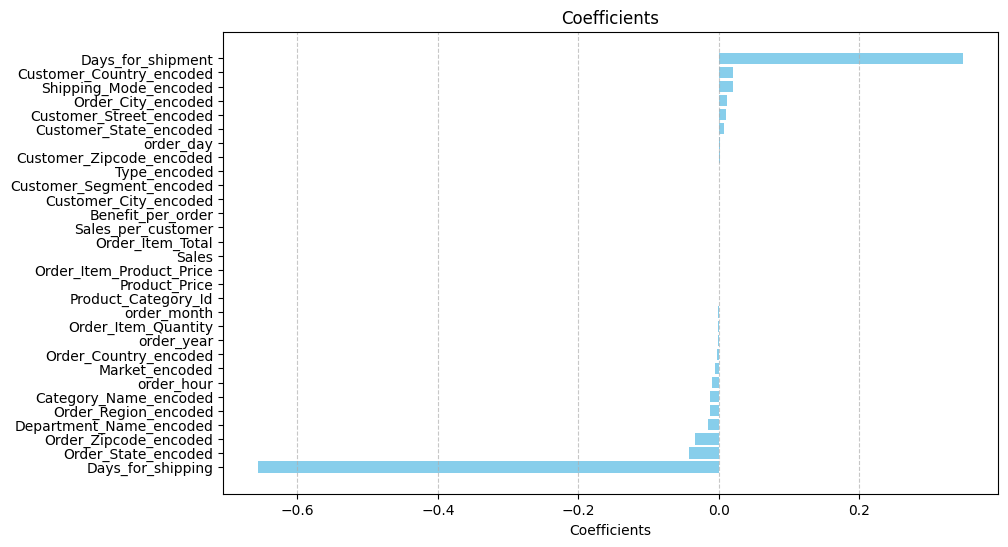

,COL,Coef
0,Days_for_shipping,-0.655728
1,Order_State_encoded,-0.042592
2,Order_Zipcode_encoded,-0.033502
3,Department_Name_encoded,-0.014895
4,Order_Region_encoded,-0.011840
5,Category_Name_encoded,-0.011728
6,order_hour,-0.009744
7,Market_encoded,-0.004968
8,Order_Country_encoded,-0.001794
9,order_year,-0.001507


,COL,Coef
20,Customer_Segment_encoded,0.000452
21,Type_encoded,0.001018
22,Customer_Zipcode_encoded,0.001567
23,order_day,0.001843
24,Customer_State_encoded,0.008237
25,Customer_Street_encoded,0.010912
26,Order_City_encoded,0.011893
27,Shipping_Mode_encoded,0.019975
28,Customer_Country_encoded,0.020539
29,Days_for_shipment,0.348014


In [ ]:
#
import pandas as pd
import matplotlib.pyplot as plt

va = lr_model.stages[-3]
lr = lr_model.stages[-1]

data_l = list(zip(va.getInputCols(), lr.coefficients))
fi_df = pd.DataFrame(data_l, columns=['COL', 'Coef'])

fi_df = fi_df.sort_values(by='Coef', ascending=True).reset_index(drop = True)


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(fi_df['COL'], fi_df['Coef'], color='skyblue')
plt.xlabel('Coefficients')
plt.title('Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

display(fi_df.head(10))
display(fi_df.tail(10))
